#### Pruebas usando los datos de Chile del dataset Manifesto Project

#### Objetivo: validar la consistencia de los datos con la realidad en el tiempo observada en Chile

#### Método:
* 1. Se filtra el dataset para dejar solamente los registros con 'countryname' = Chile
* 2. Para cada año eleccionario disponible para Chile (1989 a 2021), se calcula el promedio ponderado de las variables 'per' de cada candidato usando como peso la columna 'presvote', que representa el porcentaje de votos obtenido por cada programa en la 1a vuelta.
* Se definen los siguientes aspectos para analizar su evolución a lo largo de los períodos eleccionarios, y las variables que los explican:
*       
*       * [Inclusión y Minorías](#inclusion)
*       * Orden y Corrupción
*       * Medio Ambiente y Sostenibilidad
*       * Pueblos Originarios
*       * Derechos Humanos
*       * Inmigración
*       * Moral Tradicional 
* Se grafica el resultado para cada aspecto: tanto las variables que lo componen como el "Total" correspondiente a la suma o diferencia de las variables según sea el caso, y se provee un comentario sobre ellos.
*       * Gráfico agregado de todos los aspectos mencionados
*       * Conclusión

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
file_path = "data/MPDataset_MPDS2024a.csv"
df = pd.read_csv(file_path)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1686/3164128165.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [21]:
# Display the first few rows of the DataFrame
df.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,NaN,9.60,1.9,1.900,0.0,1.900,2024a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,...,NaN,NaN,NaN,-37.80,3.3,2.200,33.4,5.600,2024a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,11420,People’s Party,FP,40,...,NaN,NaN,NaN,9.50,3.2,6.400,14.3,1.600,2024a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,11620,Right Party,NaN,60,...,NaN,NaN,NaN,28.00,1.8,22.800,10.6,0.000,2024a,YMKVN2
4,11,Sweden,0,0,17/09/1944,194409,11810,Agrarian Party,NaN,80,...,NaN,NaN,NaN,23.81,0.0,19.048,0.0,4.762,2024a,U4SCRD


In [22]:
# Corrige nombre de Se
# Count the number of changes
count_changes = df.loc[df['candidatename'].notna() & df['candidatename'].str.contains('Piñera'), 'candidatename'].count()

# Replace the values
df.loc[df['candidatename'].notna() & df['candidatename'].str.contains('Piñera'), 'candidatename'] = 'Sebastián Piñera Echeñique'

# Print the number of changes
print(f"Number of changes: {count_changes}")

Number of changes: 3


#### Crear campo 'agno' para registrar el año del programa de gobierno

In [23]:
# Insert column 'agno' into the dataframe, of type int, to the right of column 'date'
df.insert(df.columns.get_loc('date') + 1, 'agno', df['edate'].str[-4:].astype(int))

# List unique values of new column 'agno'
unique_agno_values = df['agno'].unique()
#print(unique_agno_values)

In [24]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [25]:
# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns = ['countryname', 'candidatename', 'agno', 'presvote'] + [col for col in df.columns if col.startswith('per') and col[3].isdigit()]
#per_columns

#### PROMEDIO PONDERADO: en 'df' filtramos registros de Chile, separamos por año de elección y calculamos valores representativos basados en el promedio ponderado por el % obtenido en la elección presidencial (presvote)

In [26]:
# Filter df by 'countryname' == 'Chile'
df_Chile = df[df['countryname'] == 'Chile']

df_Chile = df_Chile.sort_values(by='agno')

# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns_4digit = [col for col in df.columns if col.startswith('per') and col[3].isdigit()]

# Group by column 'agno' and calculate the weighted average of each column in 'per_columns_4digit' using column 'presvote' as weights
df_Chile_ponderado = df_Chile.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['presvote']) for col in per_columns_4digit})
).reset_index()

# Display the results
df_Chile_ponderado

,agno,per101,per102,per103,per104,per105,per106,per107,per108,per109,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,1989,0.367161,0.049098,0.204681,2.241851,0.898452,0.567973,4.764237,0.913344,0.420679,...,0.981203,0.273091,0.340951,0.000000,0.136270,0.000000,0.000000,0.000000,1.538705,0.000000
1,1993,0.289693,0.037331,0.000000,1.127951,0.206192,0.209040,3.254579,0.721319,0.037331,...,1.866414,0.137227,0.000000,0.068965,0.034483,0.000000,0.000000,0.000000,2.902561,0.000000
2,1999,0.056430,0.126620,0.000000,2.584547,0.393984,0.112347,1.348291,0.351827,0.000000,...,1.588358,0.000000,0.449626,0.000000,1.152555,0.000000,0.000000,0.000000,2.163017,0.000000
3,2005,0.501296,0.000000,0.108972,1.237788,0.586723,0.361019,2.251643,0.646983,0.425330,...,1.451055,0.567666,0.134203,0.033551,1.563993,0.000000,0.000000,0.000000,0.783858,0.000000
4,2009,0.005651,0.000000,0.174377,0.897141,0.376400,0.029600,1.546047,0.789124,0.050161,...,0.631070,0.000000,0.000000,0.022030,2.946260,0.000000,0.000000,0.000000,2.101008,0.000000
5,2013,0.207215,0.000000,0.000000,0.966870,0.330345,0.055490,0.421749,1.206564,0.022495,...,0.389431,0.000000,0.016884,0.000000,2.622056,0.000000,0.000000,0.000000,1.865988,0.000000
6,2017,0.120377,0.007759,0.032650,0.457728,0.192404,0.146080,0.654128,0.359964,0.101033,...,4.289776,0.248078,0.966183,0.072217,0.835250,0.000000,0.077258,0.007098,0.878473,0.000000
7,2021,0.038239,0.015586,0.059179,0.688266,0.217654,0.086899,0.766963,0.170824,0.320040,...,0.989899,0.198364,0.400399,0.017372,0.882890,0.020617,0.005839,0.043345,1.705175,0.014016


In [27]:
# Exportar a df_Chile_ponderado to an Excel file
output_file_path = 'df_porcentual_Chile_ponderados.xlsx'
df_Chile_ponderado.to_excel(output_file_path, index=False)
print(f"DataFrame exported to {output_file_path}")

DataFrame exported to df_porcentual_Chile_ponderados.xlsx


#### INCLUSIÓN Y MINORÍAS (503, 705, 201_2) 

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1686/4495497.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_inclymin['Total'] = df_Chile_inclymin[col_1] + df_Chile_inclymin[col_2] + df_Chile_inclymin[col_3]


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per503.png" alt="" width="450">
  <img src="../assets/per705.png" alt="" width="450"></div>
</div>
<img src="../assets/per201_2.png" alt="" width="500">

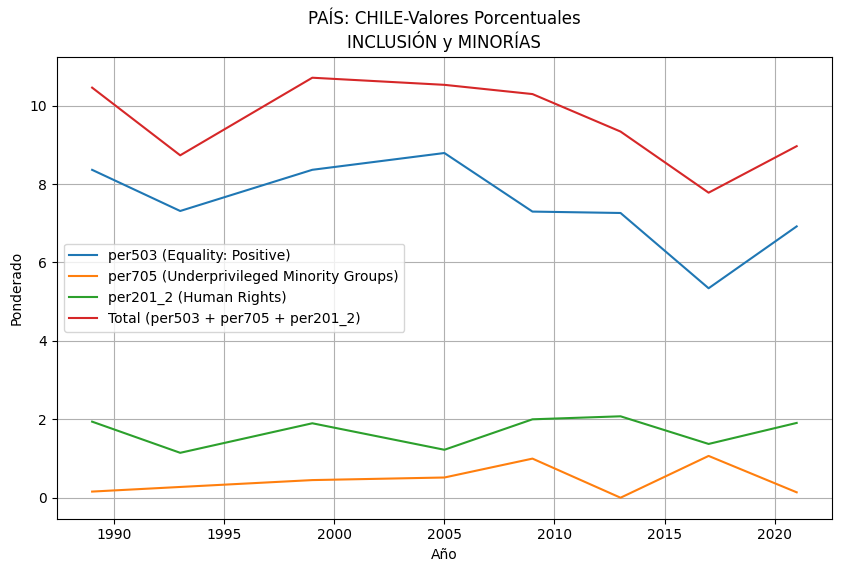

In [28]:
# Define variables for the columns
tema = "INCLUSIÓN y MINORÍAS"
col_1 = 'per503'
col_2 = 'per705'
col_3 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_inclymin = df_Chile_ponderado[['agno', col_1, col_2, col_3]]

# Add a new column 'Total' with the sum of columns
df_Chile_inclymin['Total'] = df_Chile_inclymin[col_1] + df_Chile_inclymin[col_2] + df_Chile_inclymin[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_inclymin.columns[df_Chile_inclymin.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} + {col_2} + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per503.png" alt="" width="450">
  <img src="../assets/per705.png" alt="" width="450"></div>
</div>
<img src="../assets/per201_2.png" alt="" width="500">"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin[col_1], label=label_col_1)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin[col_2], label=label_col_2)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin[col_3], label=label_col_3)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE-Valores Porcentuales\n{tema}')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a Inclusión y Minorías:
* La línea del Total muestra que el aspecto "Inclusión y Minorías" ha ido disminuyendo porcentualmente en las menciones de los programas de gobierno entre 1989 y 2021. Sin embargo es el segundo más importante de los aspectos en análisis, lo cual se puede apreciar en el gráfico resumen.

#### ORDEN y CORRUPCIÓN (605_1, -605_2, per304)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1686/74046416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_orden['Total'] = df_Chile_orden[col_1] + df_Chile_orden[col_2] + df_Chile_orden[col_3]


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per605_1-per605_2.png" alt="" width="450"></div>
  <img src="../assets/per304.png" alt="" width="450">
</div>



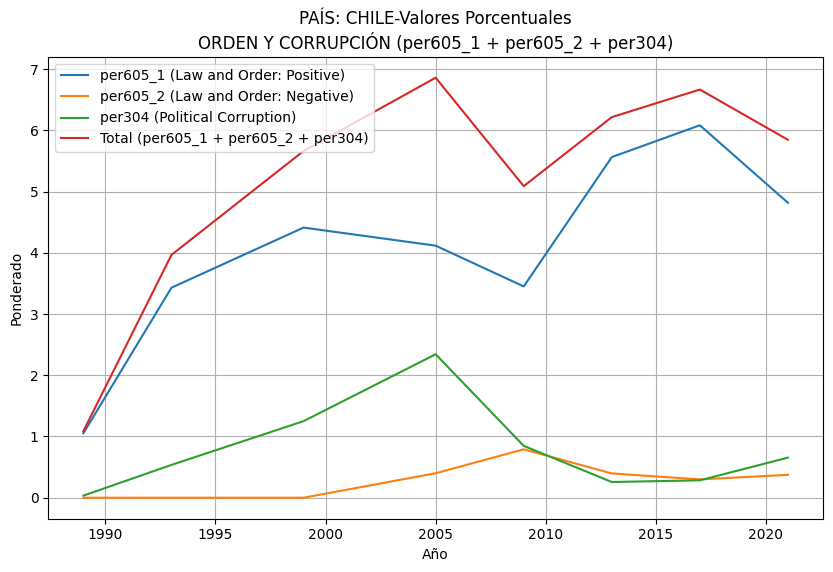

In [29]:
# Define variables for the columns
tema = "ORDEN Y CORRUPCIÓN"
col_1 = 'per605_1'
col_2 = 'per605_2'
col_3 = 'per304'

# Select columns from df_Chile_ponderado
df_Chile_orden = df_Chile_ponderado[['agno', col_1, col_2, col_3]]

# Add a new column 'Total' with the sum of columns
df_Chile_orden['Total'] = df_Chile_orden[col_1] + df_Chile_orden[col_2] + df_Chile_orden[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_orden.columns[df_Chile_orden.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} + {col_2} + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per605_1-per605_2.png" alt="" width="450"></div>
  <img src="../assets/per304.png" alt="" width="450">
</div>

"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_orden['agno'], df_Chile_orden[col_1], label=label_col_1)
plt.plot(df_Chile_orden['agno'], df_Chile_orden[col_2], label=label_col_2)
plt.plot(df_Chile_orden['agno'], df_Chile_orden[col_3], label=label_col_3)
plt.plot(df_Chile_orden['agno'], df_Chile_orden['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE-Valores Porcentuales\n{tema} ({col_1} + {col_2} + {col_3})')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a ORDEN Y CORRUPCIÓN
* Se puede apreciar claramente la importancia que ha ido adquiriendo este aspecto en Chile, variando desde 1,1 en 1989 a 5,2 en 2021 (4.8 veces). Esto ha sido impulsado por un fuerte aumento de las menciones a dotar de mayores recursos a las policías y mayor rigurosidad en los tribunales. Debe mencionarse la disminución de las menciones a la corrupción política y al abuso de este poder.  

#### MEDIO AMBIENTE Y SOSTENIBILIDAD (501, 416_2)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1686/2729631476.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_medioambiente['Total'] = df_Chile_medioambiente[col_1] + df_Chile_medioambiente[col_2]


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per501.png" alt="" width="550"></div>
  <img src="../assets/per416_2.png" alt="" width="450">
</div>


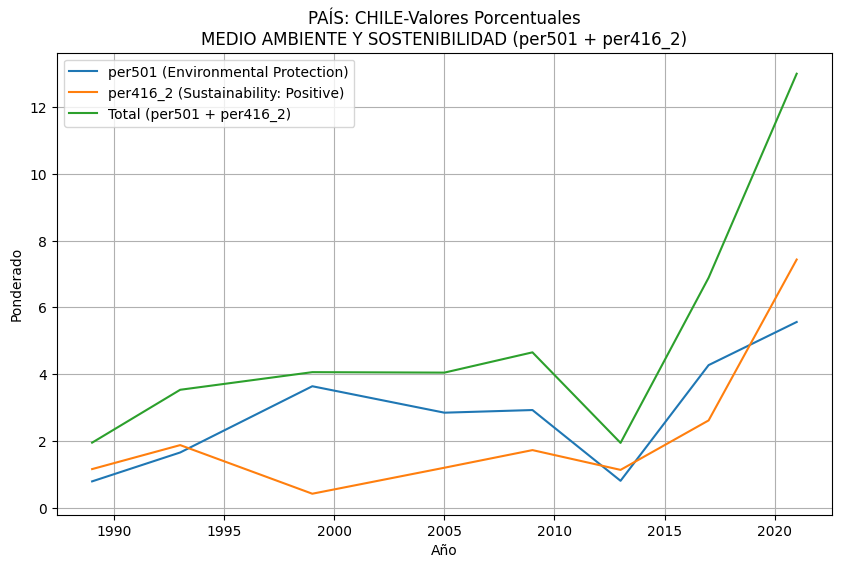

In [30]:
# Define variables for the columns
tema = "MEDIO AMBIENTE Y SOSTENIBILIDAD"
col_1 = 'per501'
col_2 = 'per416_2'

# Select columns from df_Chile_ponderado
df_Chile_medioambiente = df_Chile_ponderado[['agno', col_1, col_2]]

# Add a new column 'Total' with the sum of columns
df_Chile_medioambiente['Total'] = df_Chile_medioambiente[col_1] + df_Chile_medioambiente[col_2]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_medioambiente.columns[df_Chile_medioambiente.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per501.png" alt="" width="550"></div>
  <img src="../assets/per416_2.png" alt="" width="450">
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente[col_1], label=label_col_1)
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente[col_2], label=label_col_2)
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE-Valores Porcentuales\n{tema} ({col_1} + {col_2})')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a MEDIO AMBIENTE Y SOSTENIBILIDAD
* Este es el aspecto que evoluciona más fuerte de todos, y en todos sus componentes. 

#### PUEBLOS ORIGINARIOS (607_3, 608_3)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1686/3084294078.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_poriginarios['Total'] = df_Chile_poriginarios[col_1] + df_Chile_poriginarios[col_2]


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per607_3.png" alt="" width="550"></div>
  <img src="../assets/per608_3.png" alt="" width="550">
</div>


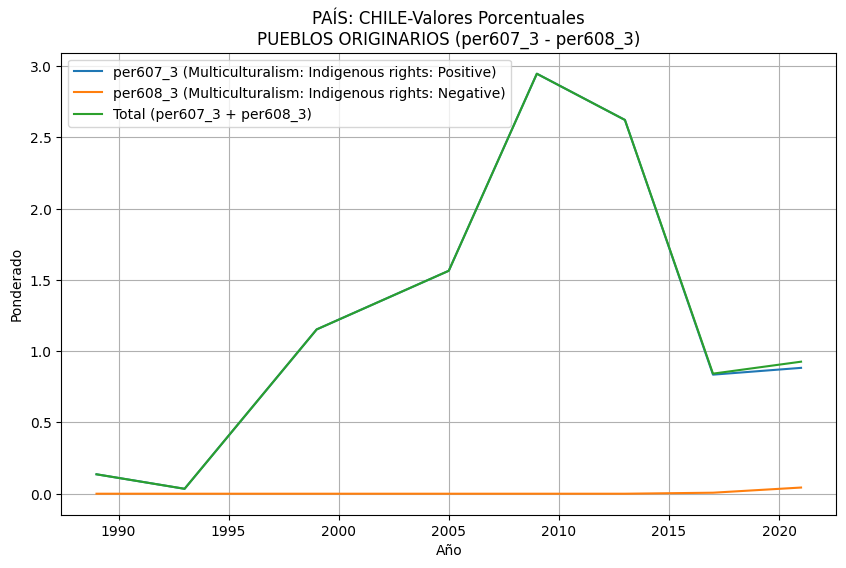

In [31]:
# Define variables for the columns
tema = "PUEBLOS ORIGINARIOS"
col_1 = 'per607_3'
col_2 = 'per608_3'

# Select columns from df_Chile_ponderado
df_Chile_poriginarios = df_Chile_ponderado[['agno', col_1, col_2]]

# Add a new column 'Total' with the sum of columns
df_Chile_poriginarios['Total'] = df_Chile_poriginarios[col_1] + df_Chile_poriginarios[col_2]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_poriginarios.columns[df_Chile_poriginarios.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per607_3.png" alt="" width="550"></div>
  <img src="../assets/per608_3.png" alt="" width="550">
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios[col_1], label=label_col_1)
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios[col_2], label=label_col_2)
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE-Valores Porcentuales\n{tema} ({col_1} - {col_2})')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a PUEBLOS ORIGINARIOS
* Luego de tener un crecimiento fuerte y sostenido entre 1989 y 2008, PUEBLOS ORIGINARIOS ha ido perdiendo fuertemente participación en las menciones en los programas de gobierno. 

#### DERECHOS HUMANOS (per201_1, per201_2)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1686/1438013925.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_hr['Total'] = df_Chile_hr[col_1] + df_Chile_hr[col_2]


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per201_1_2.png" alt="" width="550"></div>
</div>


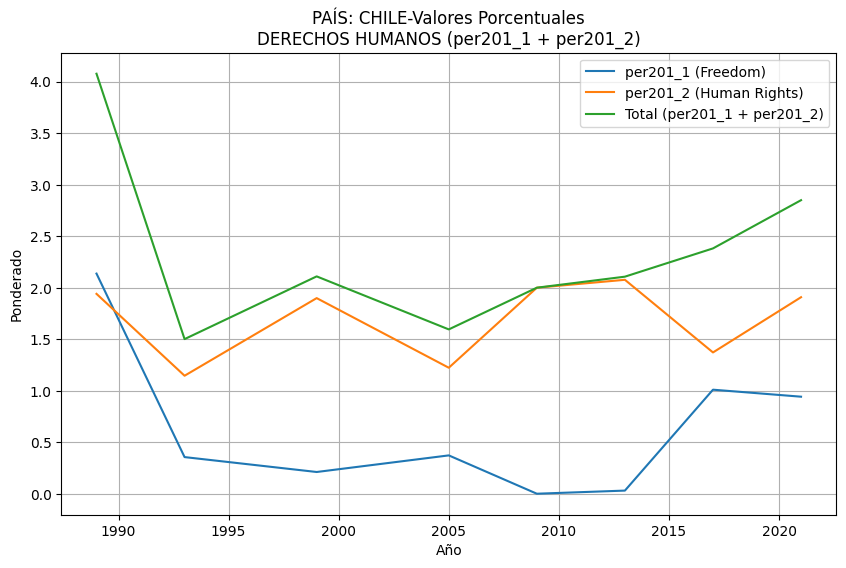

In [32]:
# Define variables for the columns
tema = "DERECHOS HUMANOS"
col_1 = 'per201_1'
col_2 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_hr = df_Chile_ponderado[['agno', col_1, col_2]]

# Add a new column 'Total' with the sum of columns
df_Chile_hr['Total'] = df_Chile_hr[col_1] + df_Chile_hr[col_2]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_hr.columns[df_Chile_hr.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per201_1_2.png" alt="" width="550"></div>
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_hr['agno'], df_Chile_hr[col_1], label=label_col_1)
plt.plot(df_Chile_hr['agno'], df_Chile_hr[col_2], label=label_col_2)
plt.plot(df_Chile_hr['agno'], df_Chile_hr['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE-Valores Porcentuales\n{tema} ({col_1} + {col_2})')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a DERECHOS HUMANOS:
* Este aspecto ha ido perdiendo participación desde 1989 a 2021, pero crece en forma sostenida desde 2005.

#### INMIGRACIÓN (602_2, 607_1)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1686/3676172456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_inmigracion['Total'] = df_Chile_inmigracion[col_1] + df_Chile_inmigracion[col_2] #+ df_Chile_inmigracion[col_3]


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per602_2.png" alt="" width="550"></div>
  <img src="../assets/per607_1.png" alt="" width="550">
</div>


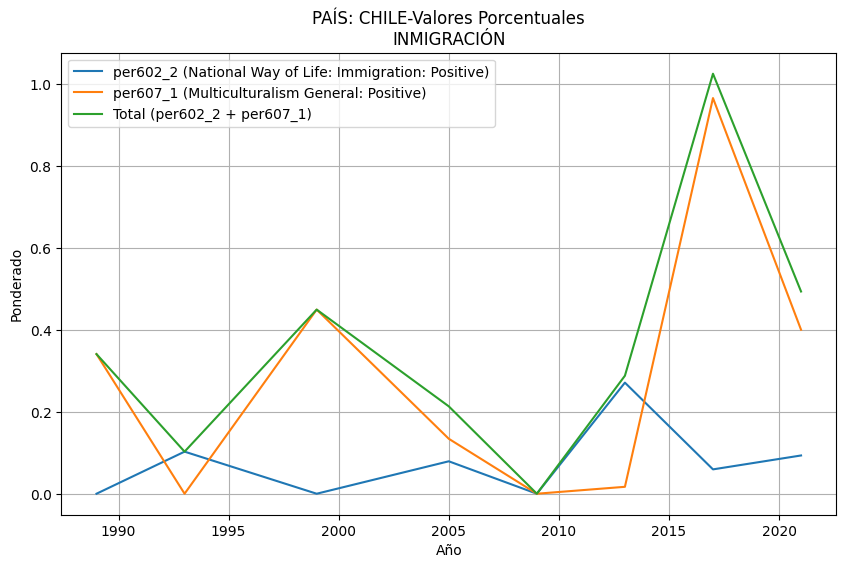

In [33]:
# Define variables for the columns
tema = "INMIGRACIÓN"
col_1 = 'per602_2'
col_2 = 'per607_1'
#col_3 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_inmigracion = df_Chile_ponderado[['agno', col_1, col_2]] #col_3

# Add a new column 'Total' with the sum of columns
df_Chile_inmigracion['Total'] = df_Chile_inmigracion[col_1] + df_Chile_inmigracion[col_2] #+ df_Chile_inmigracion[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_inmigracion.columns[df_Chile_inmigracion.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
#label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})" # + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per602_2.png" alt="" width="550"></div>
  <img src="../assets/per607_1.png" alt="" width="550">
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion[col_1], label=label_col_1)
plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion[col_2], label=label_col_2)
#plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion[col_3], label=label_col_3)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inmigracion['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE-Valores Porcentuales\n{tema}')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a INMIGRACIÓN
* Este aspecto está definido por menciones en favor de la inmigración. Llama la atención el repunte fuerte en 2008 y luego la baja brusca en 2017, posiblemente por la asociación de la inmigración con la seguridad. 

#### MORAL TRADICIONAL (603, 604)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1686/4191222185.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Chile_moral['Total'] = df_Chile_moral[col_1] + df_Chile_moral[col_2] #+ df_Chile_moral[col_3]


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per603_604.png" alt="" width="550"></div>
</div>


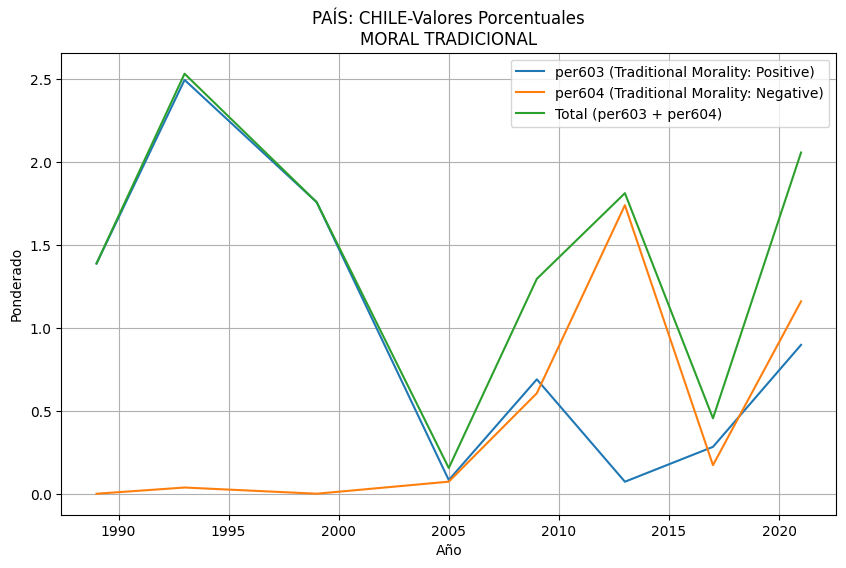

In [34]:
# Define variables for the columns
tema = "MORAL TRADICIONAL"
col_1 = 'per603'
col_2 = 'per604'
#col_3 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_moral = df_Chile_ponderado[['agno', col_1, col_2]] #col_3

# Add a new column 'Total' with the sum of columns
df_Chile_moral['Total'] = df_Chile_moral[col_1] + df_Chile_moral[col_2] #+ df_Chile_moral[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_moral.columns[df_Chile_moral.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
#label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})" # + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per603_604.png" alt="" width="550"></div>
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_moral['agno'], df_Chile_moral[col_1], label=label_col_1)
plt.plot(df_Chile_moral['agno'], df_Chile_moral[col_2], label=label_col_2)
#plt.plot(df_Chile_moral['agno'], df_Chile_moral[col_3], label=label_col_3)
plt.plot(df_Chile_moral['agno'], df_Chile_moral['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE-Valores Porcentuales\n{tema}')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a MORAL TRADICIONAL: 
* Puede observarse como a partir de 2005 comienzan a ser mencionados los aspecto relacionados con el divorcio, el aborto y la concepción de familias con composición diferente a la tradicional en Chile.

#### GRÁFICO RESUMEN

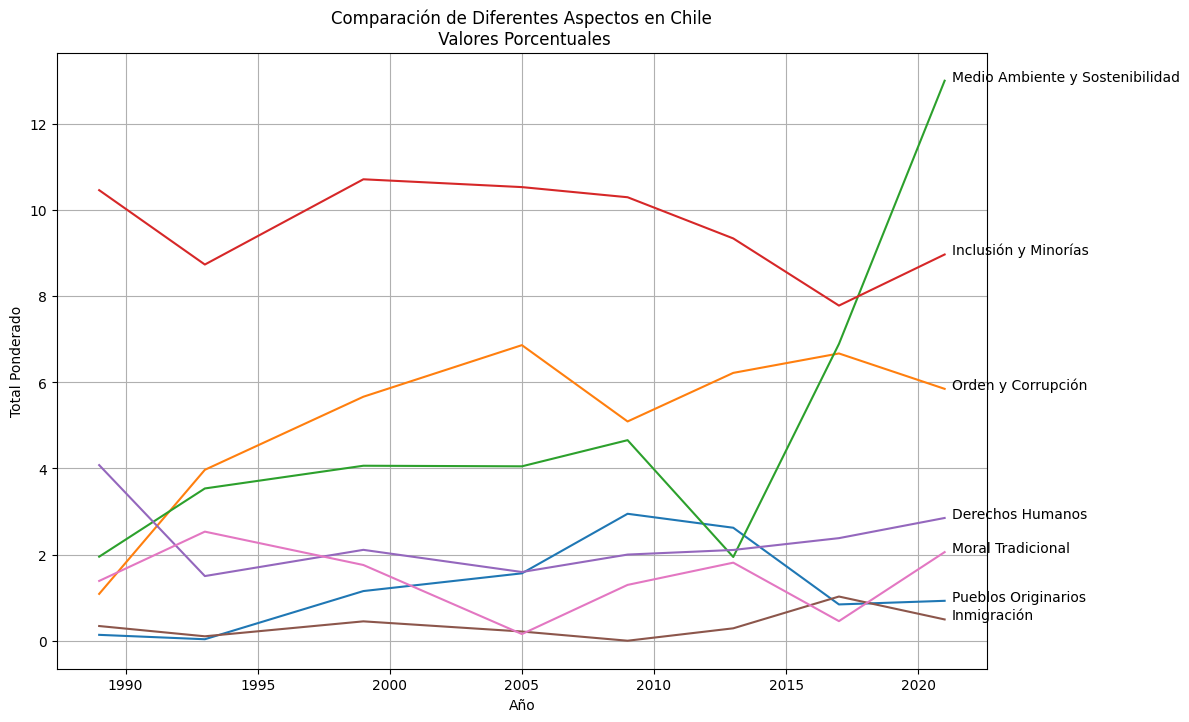

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Plot
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios['Total'], label='Pueblos Originarios')
plt.plot(df_Chile_orden['agno'], df_Chile_orden['Total'], label='Orden y Corrupción')
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente['Total'], label='Medio Ambiente y Sostenibilidad')
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label='Inclusión y Minorías')
plt.plot(df_Chile_hr['agno'], df_Chile_hr['Total'], label='Derechos Humanos')
plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion['Total'], label='Inmigración')
plt.plot(df_Chile_moral['agno'], df_Chile_moral['Total'], label='Moral Tradicional')

# Etiquetas al final de cada línea
plt.annotate('Pueblos Originarios', xy=(df_Chile_poriginarios['agno'].values[-1], df_Chile_poriginarios['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Orden y Corrupción', xy=(df_Chile_orden['agno'].values[-1], df_Chile_orden['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Medio Ambiente y Sostenibilidad', xy=(df_Chile_medioambiente['agno'].values[-1], df_Chile_medioambiente['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Inclusión y Minorías', xy=(df_Chile_inclymin['agno'].values[-1], df_Chile_inclymin['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Derechos Humanos', xy=(df_Chile_hr['agno'].values[-1], df_Chile_hr['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Inmigración', xy=(df_Chile_inmigracion['agno'].values[-1], df_Chile_inmigracion['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Moral Tradicional', xy=(df_Chile_moral['agno'].values[-1], df_Chile_moral['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Total Ponderado')
plt.title('Comparación de Diferentes Aspectos en Chile\n Valores Porcentuales')
plt.legend().set_visible(False)  # Oculta la leyenda ya que las etiquetas están al final de las líneas
plt.grid(True)

plt.show()


#### COMENTARIO GENERAL:
* Las conclusiones mencionadas en los gráficos individuales (resumidos en este cuadro comparativo), son consistentes con lo que se observa en Chile. Es posible que se pueda incorporar más variables a los aspectos mencionados de manera de tener una mejor representación, como también agregar más aspectos para analizar (Derechos Sociales, Economía, Sistema Político y otros).
* 
* En resumen, en base a este análisis, es posible sostener que el dataset habla de Chile como Chile es.

#### CHILE: TODOS LOS DOMINIOS

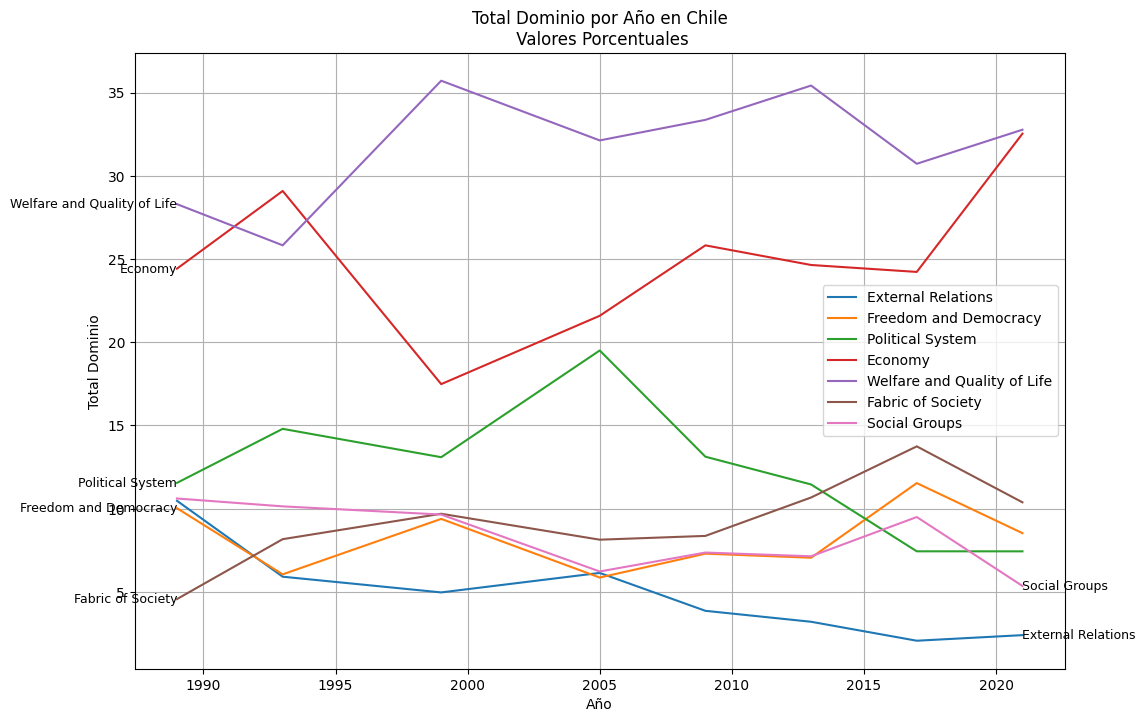

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dataframe to store the results
df_Chile_dom = pd.DataFrame()

# Loop through each unique 'Dominio' in 'df_AD'
for dominio in df_AD['Dominio'].unique():
    # Create list 'columnas_per' with values of 'Variable_per' for that 'Dominio' considering only columns with name length == 6
    columnas_per = df_AD[(df_AD['Dominio'] == dominio) & (df_AD['Variable_per'].str.len() == 6)]['Variable_per'].tolist()
    
    # Sum the columns with names in 'columnas_per' for each 'agno' in 'df_Chile_ponderado'
    df_Chile_ponderado['tot_dom'] = df_Chile_ponderado[columnas_per].sum(axis=1)
    
    # Create a temporary dataframe with 'agno', 'Dominio', and 'tot_dom'
    temp_df = df_Chile_ponderado[['agno', 'tot_dom']].copy()
    temp_df['Dominio'] = dominio
    
    # Append the temporary dataframe to 'df_Chile_dom'
    df_Chile_dom = pd.concat([df_Chile_dom, temp_df], ignore_index=True)
    
    # Reset 'columnas_per' for the next loop iteration
    columnas_per = []

# Merge 'df_Chile_dom' with 'df_AD' to get 'Nombre_Dominio'
df_Chile_dom = df_Chile_dom.merge(df_AD[['Dominio', 'Nombre_Dominio']].drop_duplicates(), on='Dominio', how='left')

# Plot the dataframe 'df_Chile_dom' with 'agno' on the horizontal axis and 'tot_dom' on the vertical axis
plt.figure(figsize=(12, 8))

for dominio in df_Chile_dom['Dominio'].unique():
    subset = df_Chile_dom[df_Chile_dom['Dominio'] == dominio]
    
    # Plot the line for each 'Dominio'
    plt.plot(subset['agno'], subset['tot_dom'], label=subset['Nombre_Dominio'].iloc[0])
    
    # Check if 'Dominio' is 'Social Groups' or 'Freedom and Democracy' and place the label at the end
    if dominio in ['Domain_7', 'Domain_1']:
        plt.text(subset['agno'].iloc[-1], subset['tot_dom'].iloc[-1], subset['Nombre_Dominio'].iloc[0], 
                 fontsize=9, ha='left', va='center')
    else:
        # Place the label at the start for other dominios
        plt.text(subset['agno'].iloc[0], subset['tot_dom'].iloc[0], subset['Nombre_Dominio'].iloc[0], 
                 fontsize=9, ha='right', va='center')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Total Dominio')
plt.title('Total Dominio por Año en Chile\n Valores Porcentuales')
plt.legend()
plt.grid(True)
plt.show()


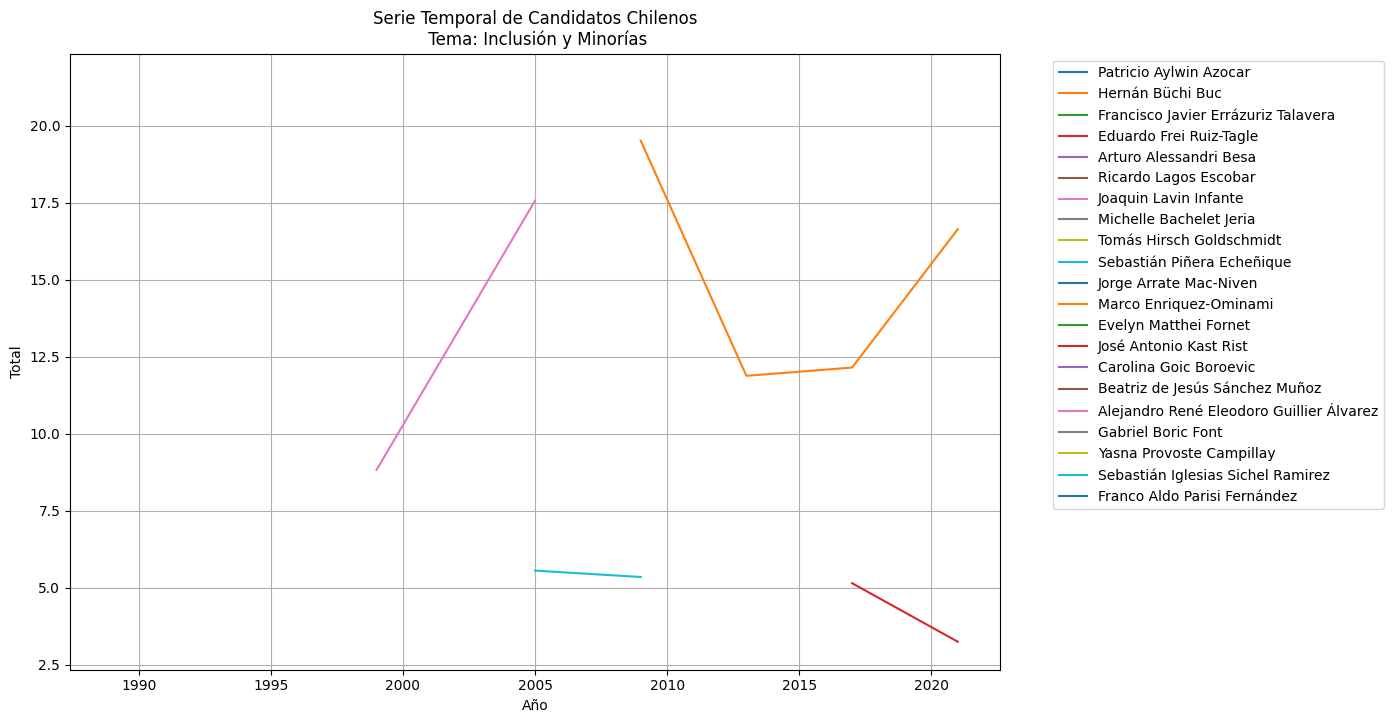

In [23]:
plt.figure(figsize=(12, 8))

# Plot each candidate's 'Total' over the years
for candidato in df_Chile_serie.columns[1:]:
    plt.plot(df_Chile_serie['agno'], df_Chile_serie[candidato], label=candidato)

plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Serie Temporal de Candidatos Chilenos\n Tema: Inclusión y Minorías')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()